# Analyzing Historical Stock and Index Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime

%matplotlib inline

In [2]:
pd.set_option('min_rows', 10)
pd.set_option('max_rows', 20)

## 1. Obtaining historical stock and index data


- Fetching stock data from Yahoo!


- Let's request the previous three years (2018 October through 2021 October) of data for Tesla.

In [3]:
start = datetime.date(2018, 10, 1)
end = datetime.date(2021, 10, 1)

> Let's extract stock data for TSLA.


> DataReader() extracts the stock prices for the S&P 500 for the dates we selected from Yahoo Finance.

In [4]:
TESLA = web.DataReader('TSLA','yahoo',
                       start, end)

#第一个参数为股票代码
#第二个参数为从哪里获得相关的股票数据
#第三、四个参数为股票数据的起始时间和终止时间
#返回的数据格式为DataFrame

TESLA.head()

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2018-10-01  62.287998  60.209999  61.153999  62.139999  108888000.0  62.139999
2018-10-02  63.368000  59.830002  62.790001  60.203999   58717500.0  60.203999
2018-10-03  60.919998  58.313999  60.666000  58.959999   39975000.0  58.959999
2018-10-04  58.799999  55.534000  58.790001  56.366001   49071000.0  56.366001
2018-10-05  54.976002  52.000000  54.930000  52.389999   89722500.0  52.389999

> Then Let's retrieves the historical prices for a list of stocks.

In [5]:
def obtain(tickers, start, end):
    
    def data(ticker):
        return web.DataReader(ticker, 'yahoo', start, end)
    
    stocks = map(data, tickers)
    
    return pd.concat(stocks, 
                      keys=tickers,
                      names=['Ticker','Date'])

In [6]:
tickers = ["AAPL", "MSFT", "NFLX", "FB", "BA", "UAL", "GS", "JPM"]

In [7]:
stock8 = obtain(tickers, start, end)

In [8]:
stock8.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2018-10-01  57.355000  56.587502  56.987499  56.814999   94403200.0   
       2018-10-02  57.500000  56.657501  56.812500  57.320000   99152800.0   
       2018-10-03  58.367500  57.445000  57.512501  58.017502  114619200.0   
       2018-10-04  58.087502  56.682499  57.695000  56.997501  128168000.0   
       2018-10-05  57.102501  55.145000  56.990002  56.072498  134322000.0   

                   Adj Close  
Ticker Date                   
AAPL   2018-10-01  54.962944  
       2018-10-02  55.451477  
       2018-10-03  56.126251  
       2018-10-04  55.139500  
       2018-10-05  54.244644

### 2. Analysis and Visualization

In [9]:
adj_close = stock8[['Adj Close']].reset_index()

adj_close.head()

Ticker       Date  Adj Close
0   AAPL 2018-10-01  54.962944
1   AAPL 2018-10-02  55.451477
2   AAPL 2018-10-03  56.126251
3   AAPL 2018-10-04  55.139500
4   AAPL 2018-10-05  54.244644

> Now let's pivot Date to the index, Ticker values to columns.

In [10]:
daily_closing_prices = adj_close.pivot(index='Date',
                                       columns='Ticker',
                                       values='Adj Close')

daily_closing_prices.to_csv('Adj_Close_Prices_of_8_Stocks.csv',
                            index=False)

daily_closing_prices.head()

Ticker           AAPL          BA          FB          GS         JPM  \
Date                                                                    
2018-10-01  54.962944  369.762482  162.440002  211.012375  102.271454   
2018-10-02  55.451477  373.708801  159.330002  211.705353  102.694977   
2018-10-03  56.126251  379.444489  162.429993  213.306702  103.659119   
2018-10-04  55.139500  377.210175  158.850006  213.025757  104.593704   
2018-10-05  54.244644  373.805511  157.330002  211.368240  104.003906   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-01  111.313286  381.429993  87.610001  
2018-10-02  110.870384  377.140015  86.709999  
2018-10-03  110.889648  377.049988  87.389999  
2018-10-04  108.598099  363.649994  86.040001  
2018-10-05  107.962608  351.350006  84.139999

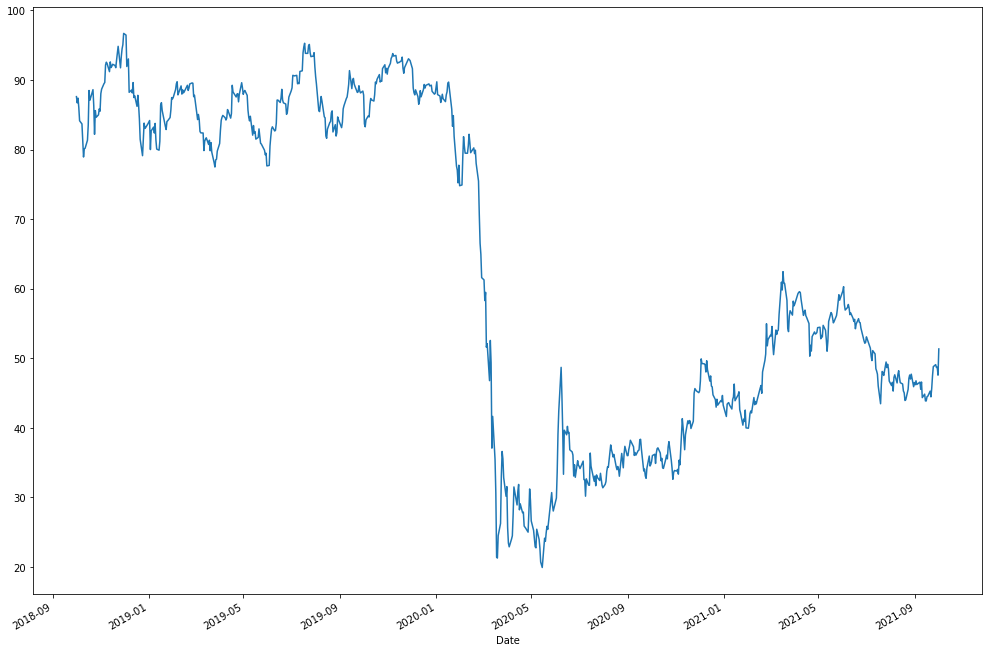

In [11]:
daily_closing_prices['UAL'].plot(figsize=(17,12))

plt.savefig('UAL.png', dpi=330)

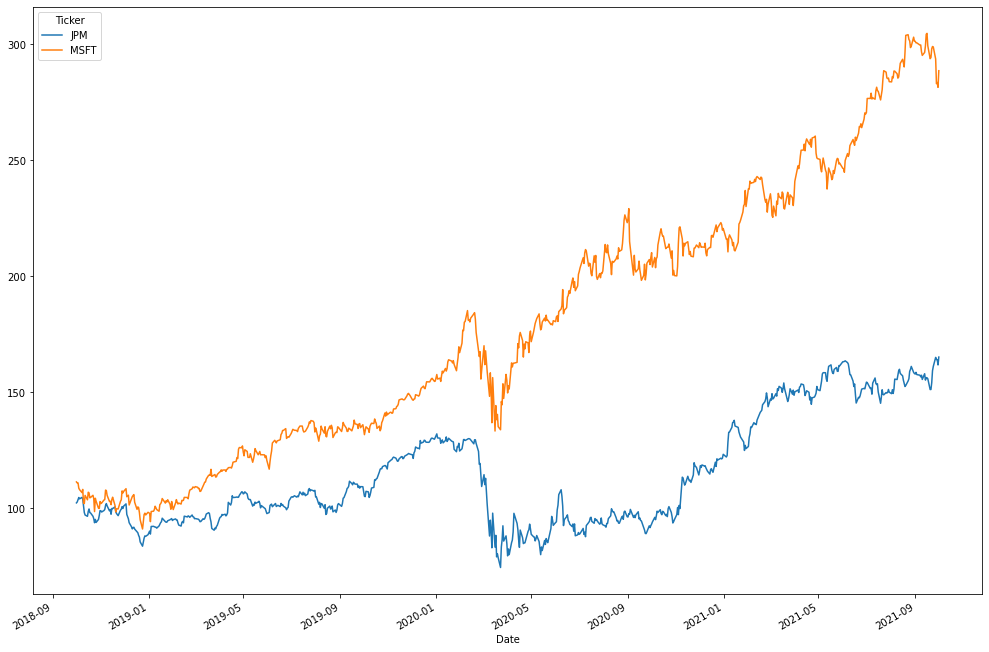

In [12]:
daily_closing_prices[['JPM','MSFT']].plot(figsize=(17,12))

plt.savefig('JPM VS MSFT.png', dpi=330)

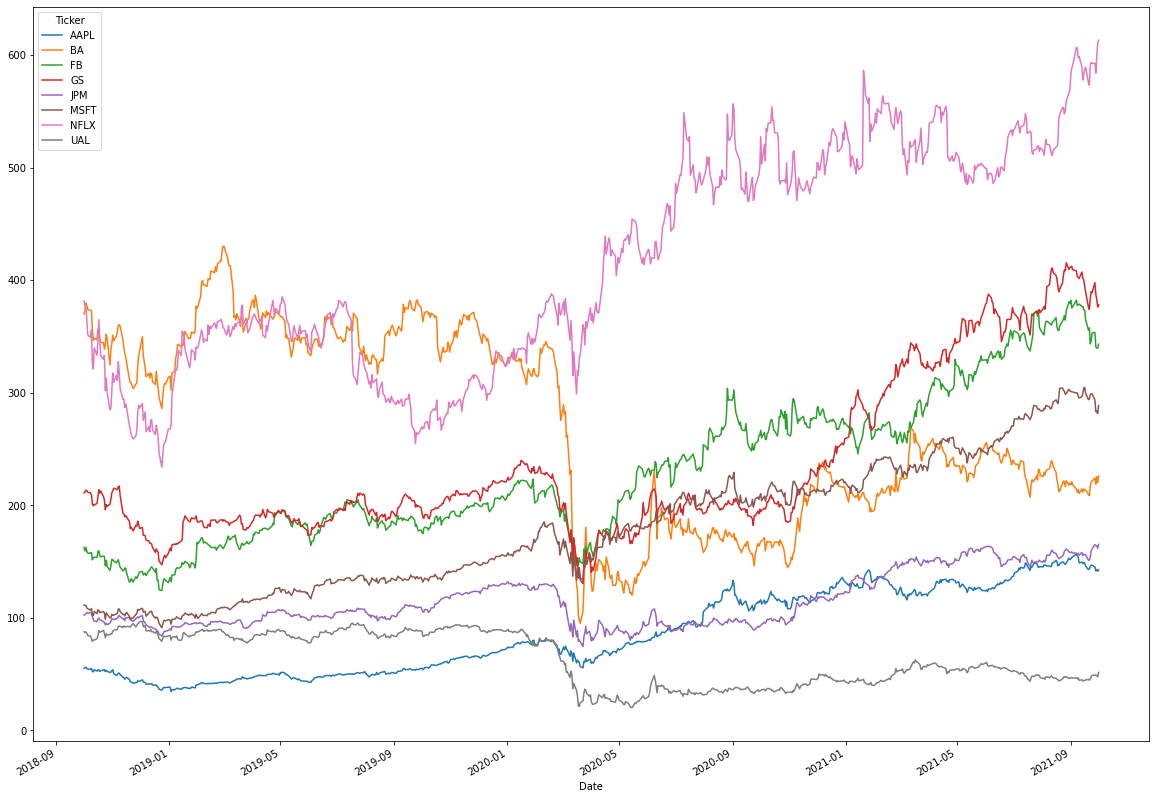

In [13]:
daily_closing_prices.plot(figsize=(20,15))

plt.savefig('Stock8.png', dpi=600)

- Plotting volumes series data


> Let's obtain the daily volumes for Facebook.

In [14]:
FB_Volume = stock8['Volume'].loc['FB']

# FB_Volume = stock8.loc['FB'][['Volume']] → another way 

FB_Volume.tail()

Date
2021-09-27    15205800.0
2021-09-28    21710300.0
2021-09-29    14452200.0
2021-09-30    16547100.0
2021-10-01    14905300.0
Name: Volume, dtype: float64

<BarContainer object of 757 artists>

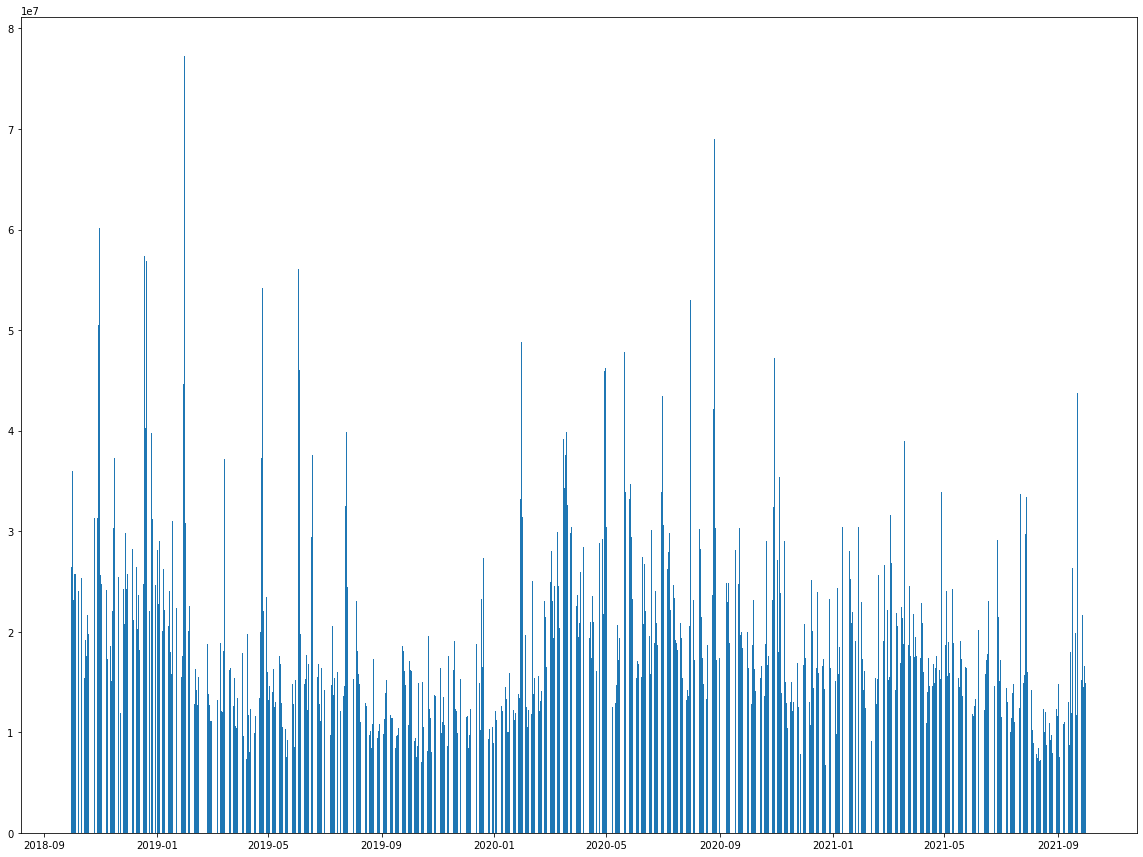

In [15]:
fig, ax = plt.subplots(figsize=(20,15))

plt.bar(FB_Volume.index, FB_Volume)

> Combined Price and Volumes

In [16]:
FB_Prices = stock8.loc['FB'][['Adj Close']]

FB_Prices.head()

Adj Close
Date                  
2018-10-01  162.440002
2018-10-02  159.330002
2018-10-03  162.429993
2018-10-04  158.850006
2018-10-05  157.330002

Text(0, 0.5, 'FB Prices ($)')

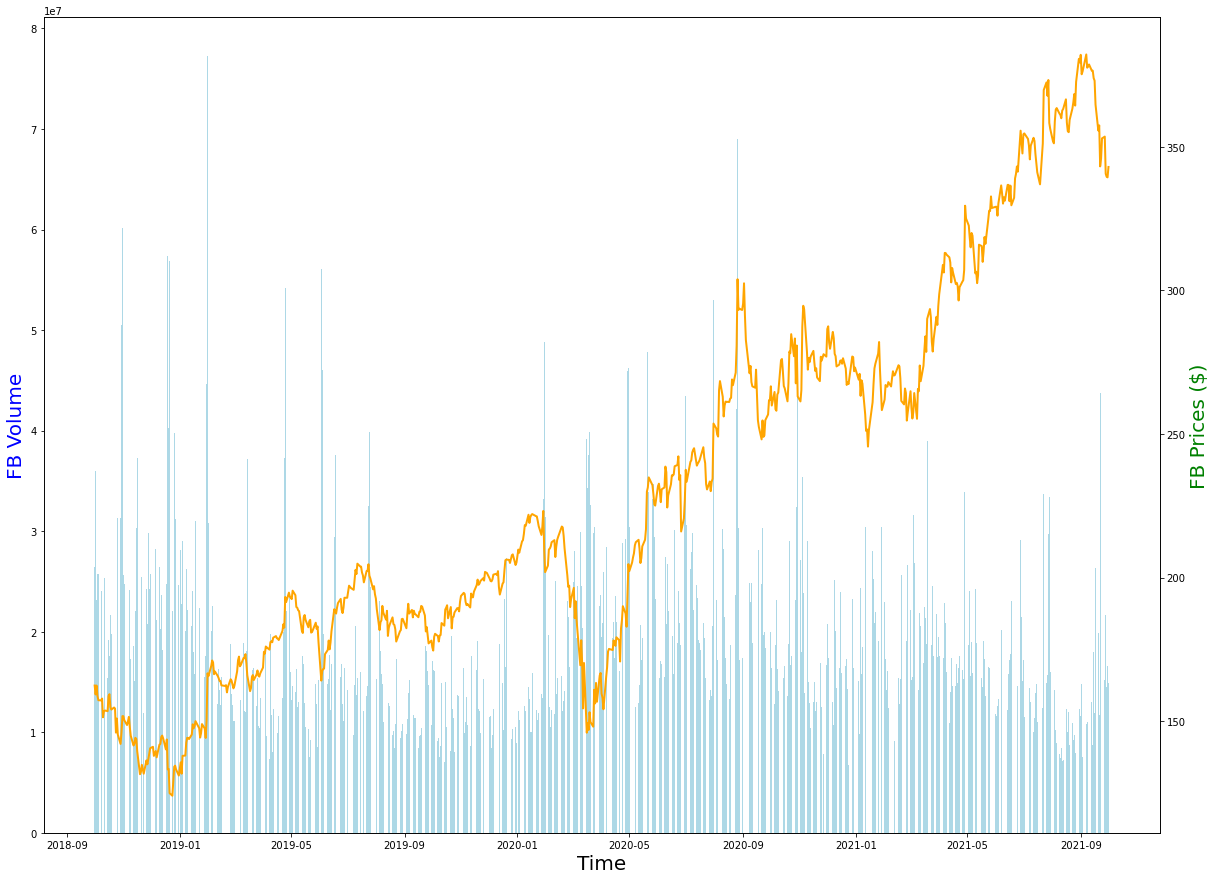

In [17]:
fig, ax1 = plt.subplots(figsize=(20,15))

ax2 = ax1.twinx()

ax1.bar(FB_Volume.index, FB_Volume, color='lightblue')
ax2.plot(FB_Prices.index, FB_Prices,
         '-',
         color='orange',
         lw=2)

ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('FB Volume', fontsize=20, color='blue')
ax2.set_ylabel('FB Prices ($)', fontsize=20, color='green')

## 3. Candlestick chart


> A candlestick chart is a powerful chart in finance that shows the starting price, closing price, highest price and lowerst price of a trading day.



- Let's create a candlestick chart of the stock prices for the S&P 500 over the past 3 years (between 2018 October and 2021 October).

In [18]:
SP500 = web.DataReader('SPY',
                       'yahoo',
                       start,
                       end).reset_index()

SP500.head()

Date        High         Low        Open       Close       Volume  \
0 2018-10-01  292.929993  290.980011  292.109985  291.730011   62078900.0   
1 2018-10-02  292.359985  291.140015  291.559998  291.559998   47258200.0   
2 2018-10-03  293.209991  291.320007  292.739990  291.720001   64694600.0   
3 2018-10-04  291.239990  287.660004  291.179993  289.440002  111545900.0   
4 2018-10-05  290.269989  286.220001  289.690002  287.820007  105951700.0   

    Adj Close  
0  275.752350  
1  275.591614  
2  275.742859  
3  273.587708  
4  272.056458

In [19]:
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [20]:
SP500_CLOSE = go.Scatter(x=SP500['Date'],
                         y=SP500['Close'])

go.Figure(SP500_CLOSE)

> Let's make an object that defines buttons (and what they do)

In [21]:
candlestick = [go.Candlestick(x=SP500['Date'],
                              open=SP500['Open'],
                              high=SP500['High'],
                              low=SP500['Low'],
                              close=SP500['Close'])]

go.Figure(candlestick)

> Let's compare **BA** and **SP500**.

In [22]:
BA = stock8.loc['BA'].reset_index()

BA

Date        High         Low        Open       Close      Volume  \
0   2018-10-01  383.209991  375.000000  375.160004  382.290009   4755700.0   
1   2018-10-02  388.619995  379.769989  380.850006  386.369995   4622600.0   
2   2018-10-03  394.279999  386.690002  388.899994  392.299988   4794300.0   
3   2018-10-04  391.089996  385.290009  390.739990  389.989990   3822300.0   
4   2018-10-05  392.390015  383.029999  389.000000  386.470001   2899700.0   
..         ...         ...         ...         ...         ...         ...   
752 2021-09-27  228.600006  223.880005  224.000000  224.160004   9749200.0   
753 2021-09-28  224.580002  216.419998  222.899994  218.410004   9639800.0   
754 2021-09-29  229.940002  224.860001  227.800003  225.360001  16808000.0   
755 2021-09-30  226.149994  219.460007  226.080002  219.940002  10356200.0   
756 2021-10-01  226.720001  220.600006  222.850006  226.000000   9113600.0   

      Adj Close  
0    369.762482  
1    373.708801  
2    379.444489  
3    377.210175  
4    373.805511  
..          ...  
752  224.160004  
753  218.410004  
754  225.360001  
755  219.940002  
756  226.000000  

[757 rows x 7 columns]

In [23]:
for_comparsion = [go.Scatter(x=SP500['Date'], y=SP500['Close'], name='SP500'),
                  go.Scatter(x=BA['Date'], y=BA['Close'], name='Boeing')]

In [24]:
updatemenus = list([dict(active=-1,
                         buttons=list([dict(label='SP500',
                                            method='update',
                                            args=[{'visible':[True,False]},
                                                  {'title':'SP500'}]),
                                       dict(label='Boeing',
                                            method='update',
                                            args=[{'visible':[False,True]},
                                                  {'title':'Boeing'}]),
                                       dict(label='SP500 VS Boeing',
                                            method='update',
                                            args=[{'visible':[True,True]},
                                                  {'title':'SP500 VS Boeing'}])]))])

layout = dict(title='Yahoo! Finance',
              updatemenus=updatemenus) # this is for our buttons

figure = dict(data=for_comparsion,
              layout=layout)

go.Figure(figure)

- One of the most important questions in data science practice (in finance) is "compared with what"?



> How would we visualize this again in a way that makes the returns of Boeing more easily comparable to the returns of the benchmark S&P 500?

In [25]:
another_comparsion = [go.Scatter(x=SP500['Date'], y=SP500['Close']/SP500.iloc[0]['Close'], name='S&P 500'),
                      go.Scatter(x=BA['Date'], y=BA['Close']/BA.iloc[0]['Close'], name='Boeing')]

In [26]:
layout_for_another_comparsion = dict(title='Yahoo! Finance',
                                     showlegend=True,
                                     updatemenus=updatemenus)

figure2 = dict(data=another_comparsion,
               layout=layout_for_another_comparsion)

go.Figure(figure2)

## 4. Some Fundamental Financial Calculations


### `Daily percentage change`

In [27]:
daily_closing_prices

Ticker            AAPL          BA          FB          GS         JPM  \
Date                                                                     
2018-10-01   54.962944  369.762482  162.440002  211.012375  102.271454   
2018-10-02   55.451477  373.708801  159.330002  211.705353  102.694977   
2018-10-03   56.126251  379.444489  162.429993  213.306702  103.659119   
2018-10-04   55.139500  377.210175  158.850006  213.025757  104.593704   
2018-10-05   54.244644  373.805511  157.330002  211.368240  104.003906   
...                ...         ...         ...         ...         ...   
2021-09-27  145.158142  224.160004  353.579987  397.711182  164.990845   
2021-09-28  141.703186  218.410004  340.649994  387.455322  164.101562   
2021-09-29  142.621857  225.360001  339.609985  382.869537  163.973114   
2021-09-30  141.293793  219.940002  339.390015  376.045532  161.740036   
2021-10-01  142.442108  226.000000  343.010010  378.005188  165.139069   

Ticker            MSFT        NFLX        UAL  
Date                                           
2018-10-01  111.313286  381.429993  87.610001  
2018-10-02  110.870384  377.140015  86.709999  
2018-10-03  110.889648  377.049988  87.389999  
2018-10-04  108.598099  363.649994  86.040001  
2018-10-05  107.962608  351.350006  84.139999  
...                ...         ...        ...  
2021-09-27  293.632812  592.640015  49.080002  
2021-09-28  283.002228  583.849976  48.680000  
2021-09-29  283.481354  599.059998  48.709999  
2021-09-30  281.405182  610.340027  47.570000  
2021-10-01  288.572052  613.150024  51.340000  

[757 rows x 8 columns]

In [28]:
# first calculate % change from day0 to day1
# for example AAPL

return_T1 = daily_closing_prices['AAPL'][1] / daily_closing_prices['AAPL'][0] - 1
return_T1

# another expression
# return_T1 = (daily_closing_prices.iloc[0]['AAPL']
#             / daily_closing_prices.iloc[1]['AAPL']) - 1

0.008888407064696402

> Let's do this calculation for all 8 stocks.


- ① First method

In [29]:
daily_percent_change = daily_closing_prices.iloc[1:] / daily_closing_prices.iloc[:-1].values - 1

daily_percent_change

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-02  0.008888  0.010673 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012169  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
2018-10-08 -0.002318 -0.001811 -0.000508 -0.001595  0.006107 -0.011415   
...              ...       ...       ...       ...       ...       ...   
2021-09-27 -0.010550  0.012512  0.001757  0.022924  0.024166 -0.017304   
2021-09-28 -0.023801 -0.025651 -0.036569 -0.025787 -0.005390 -0.036204   
2021-09-29  0.006483  0.031821 -0.003053 -0.011836 -0.000783  0.001693   
2021-09-30 -0.009312 -0.024050 -0.000648 -0.017823 -0.013619 -0.007324   
2021-10-01  0.008127  0.027553  0.010666  0.005211  0.021015  0.025468   

Ticker          NFLX       UAL  
Date                            
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
2018-10-08 -0.006404 -0.005467  
...              ...       ...  
2021-09-27  0.000422  0.005944  
2021-09-28 -0.014832 -0.008150  
2021-09-29  0.026051  0.000616  
2021-09-30  0.018830 -0.023404  
2021-10-01  0.004604  0.079252  

[756 rows x 8 columns]

### ② Second method

In [30]:
daily_per_change = daily_closing_prices / daily_closing_prices.shift(1) - 1

daily_per_change

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-10-02  0.008888  0.010673 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012169  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-09-27 -0.010550  0.012512  0.001757  0.022924  0.024166 -0.017304   
2021-09-28 -0.023801 -0.025651 -0.036569 -0.025787 -0.005390 -0.036204   
2021-09-29  0.006483  0.031821 -0.003053 -0.011836 -0.000783  0.001693   
2021-09-30 -0.009312 -0.024050 -0.000648 -0.017823 -0.013619 -0.007324   
2021-10-01  0.008127  0.027553  0.010666  0.005211  0.021015  0.025468   

Ticker          NFLX       UAL  
Date                            
2018-10-01       NaN       NaN  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-09-27  0.000422  0.005944  
2021-09-28 -0.014832 -0.008150  
2021-09-29  0.026051  0.000616  
2021-09-30  0.018830 -0.023404  
2021-10-01  0.004604  0.079252  

[757 rows x 8 columns]

### ③ Third method

> **df.pct_change()** function

In [31]:
daily_per_change_pandas = daily_closing_prices.pct_change()

daily_per_change_pandas

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01       NaN       NaN       NaN       NaN       NaN       NaN   
2018-10-02  0.008888  0.010673 -0.019146  0.003284  0.004141 -0.003979   
2018-10-03  0.012169  0.015348  0.019456  0.007564  0.009388  0.000174   
2018-10-04 -0.017581 -0.005888 -0.022040 -0.001317  0.009016 -0.020665   
2018-10-05 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639 -0.005852   
...              ...       ...       ...       ...       ...       ...   
2021-09-27 -0.010550  0.012512  0.001757  0.022924  0.024166 -0.017304   
2021-09-28 -0.023801 -0.025651 -0.036569 -0.025787 -0.005390 -0.036204   
2021-09-29  0.006483  0.031821 -0.003053 -0.011836 -0.000783  0.001693   
2021-09-30 -0.009312 -0.024050 -0.000648 -0.017823 -0.013619 -0.007324   
2021-10-01  0.008127  0.027553  0.010666  0.005211  0.021015  0.025468   

Ticker          NFLX       UAL  
Date                            
2018-10-01       NaN       NaN  
2018-10-02 -0.011247 -0.010273  
2018-10-03 -0.000239  0.007842  
2018-10-04 -0.035539 -0.015448  
2018-10-05 -0.033824 -0.022083  
...              ...       ...  
2021-09-27  0.000422  0.005944  
2021-09-28 -0.014832 -0.008150  
2021-09-29  0.026051  0.000616  
2021-09-30  0.018830 -0.023404  
2021-10-01  0.004604  0.079252  

[757 rows x 8 columns]

> Then,let's set NaN's to 0 (USE the function **fillna()**)

In [32]:
daily_per_change_pandas.fillna(0, inplace=True)

##  `Calculating simple daily cumulative returns`


> Let's calculate the cumulative daily returns (USE the function **cumprod()**)

In [33]:
cumulative_daily_return = (1 + daily_per_change_pandas).cumprod()

cumulative_daily_return

Ticker          AAPL        BA        FB        GS       JPM      MSFT  \
Date                                                                     
2018-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-10-02  1.008888  1.010673  0.980854  1.003284  1.004141  0.996021   
2018-10-03  1.021165  1.026184  0.999938  1.010873  1.013568  0.996194   
2018-10-04  1.003212  1.020142  0.977900  1.009542  1.022707  0.975608   
2018-10-05  0.986931  1.010934  0.968542  1.001686  1.016940  0.969899   
...              ...       ...       ...       ...       ...       ...   
2021-09-27  2.641018  0.606227  2.176681  1.884777  1.613264  2.637895   
2021-09-28  2.578159  0.590676  2.097082  1.836173  1.604569  2.542394   
2021-09-29  2.594873  0.609472  2.090680  1.814441  1.603313  2.546698   
2021-09-30  2.570710  0.594814  2.089325  1.782102  1.581478  2.528047   
2021-10-01  2.591603  0.611203  2.111610  1.791389  1.614713  2.592431   

Ticker          NFLX       UAL  
Date                            
2018-10-01  1.000000  1.000000  
2018-10-02  0.988753  0.989727  
2018-10-03  0.988517  0.997489  
2018-10-04  0.953386  0.982080  
2018-10-05  0.921139  0.960393  
...              ...       ...  
2021-09-27  1.553732  0.560210  
2021-09-28  1.530687  0.555644  
2021-09-29  1.570563  0.555987  
2021-09-30  1.600136  0.542975  
2021-10-01  1.607503  0.586006  

[757 rows x 8 columns]

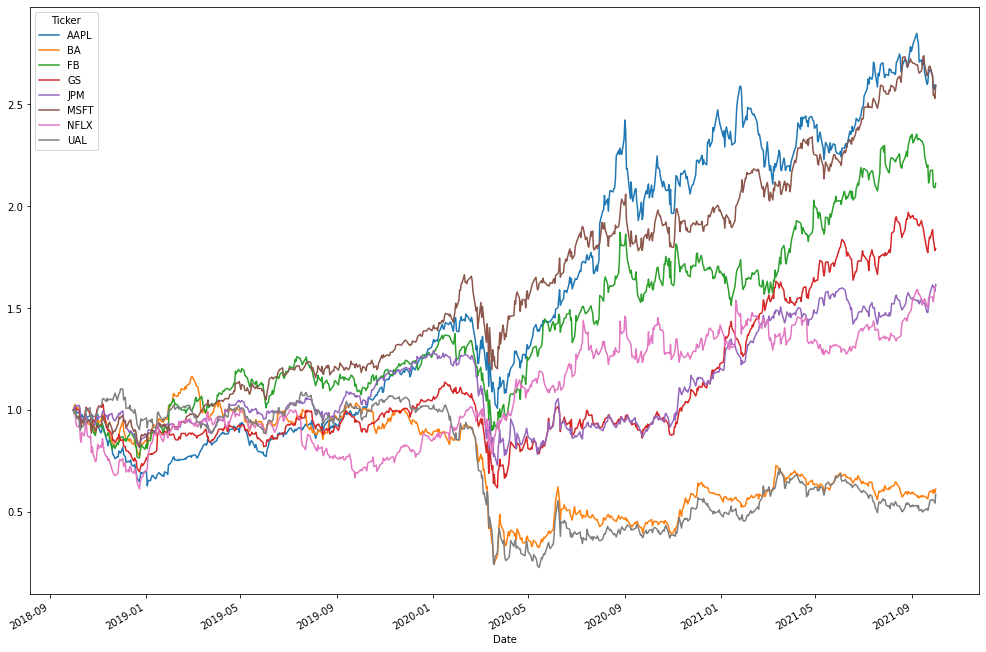

In [34]:
# Visualize the cumulative returns

cumulative_daily_return.plot(figsize=(17,12))

plt.savefig('cumulative_returns.png', dpi=660)

## 5. The Analysis on Distribution of Returns



- Let's visualize daily % change values histogram for GS using 50 bins.

<AxesSubplot:>

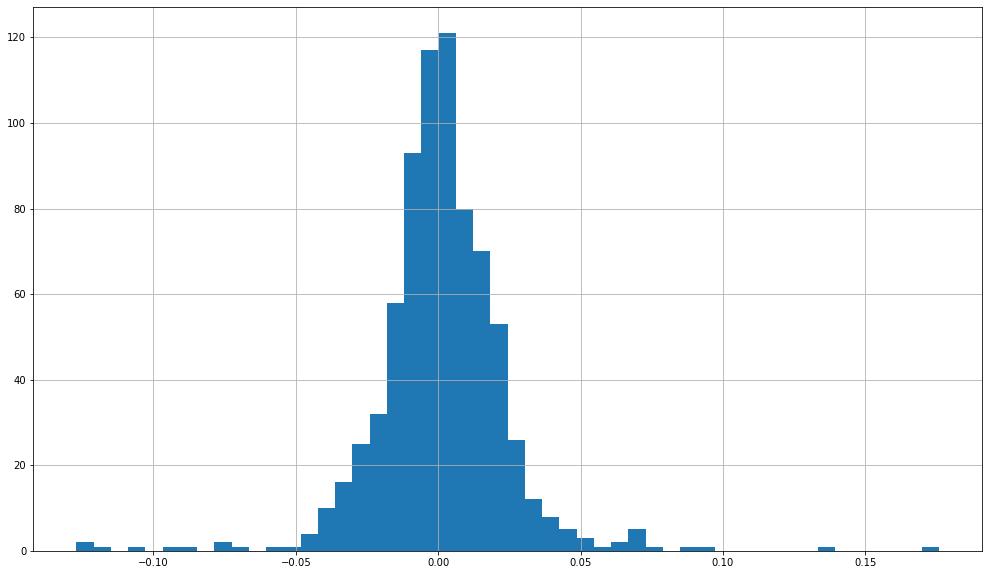

In [35]:
GS_daily_per_change = daily_per_change_pandas['GS']

GS_daily_per_change.hist(bins=50,
                         figsize=(17,10))

- Let's visualize all the cumulative return distributions using 50 bins.

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'BA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'JPM'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'NFLX'}>,
        <AxesSubplot:title={'center':'UAL'}>, <AxesSubplot:>]],
      dtype=object)

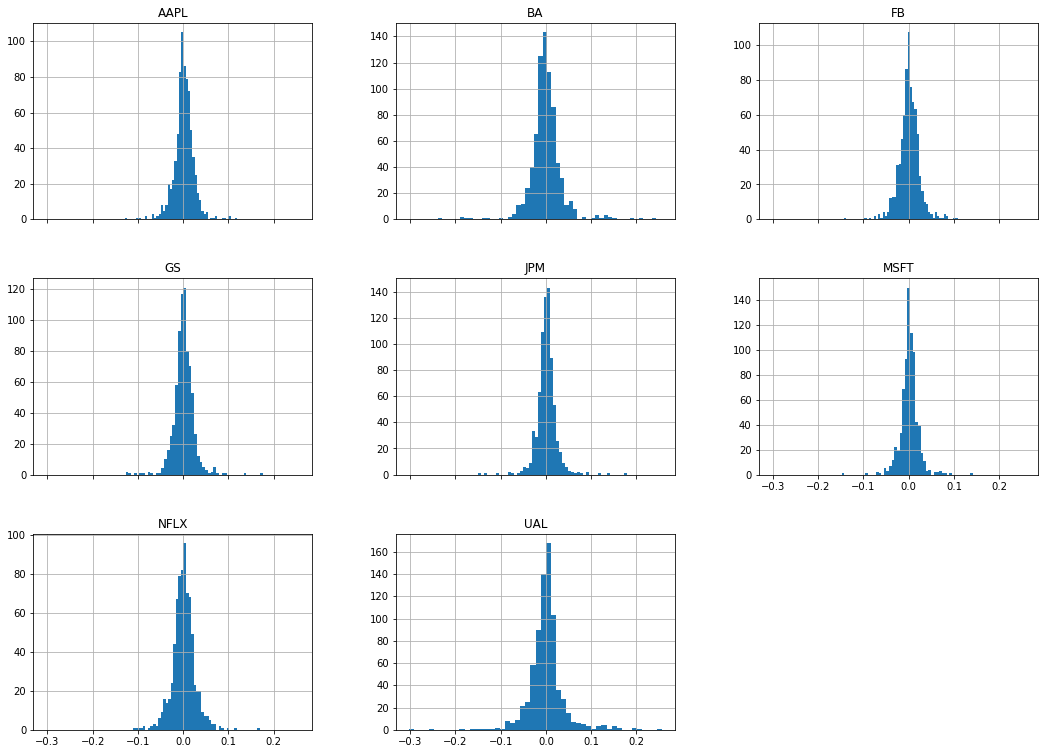

In [36]:
daily_per_change_pandas.hist(bins=50,
                             figsize=(18,13),
                             sharex=True)

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'BA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'JPM'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'NFLX'}>,
        <AxesSubplot:title={'center':'UAL'}>, <AxesSubplot:>]],
      dtype=object)

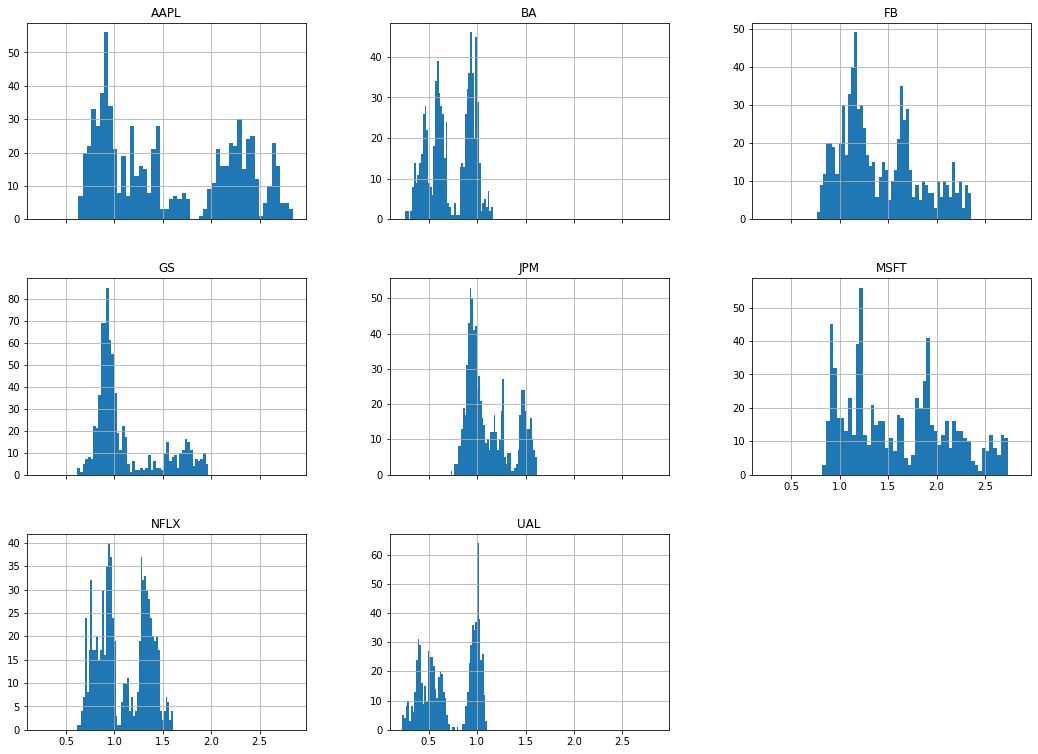

In [37]:
cumulative_daily_return.hist(bins=50,
                             figsize=(18,13),
                             sharex=True)

## 6. QQ-Plots


> create a qq-plot of GS returns vs normal distribution

In [38]:
import scipy.stats as stats

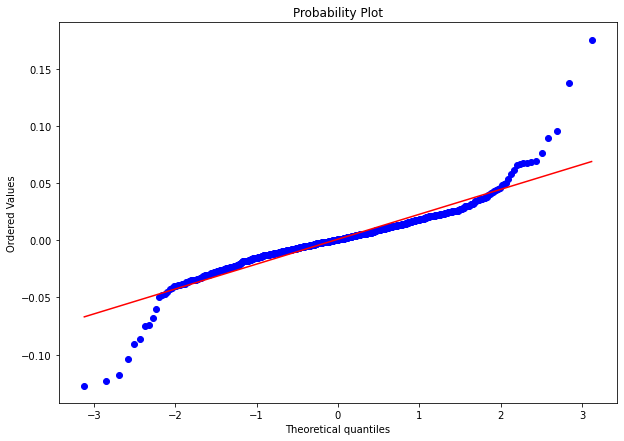

In [39]:
fig = plt.figure(figsize=(10,7))

ax = fig.add_subplot(111)

stats.probplot(GS_daily_per_change,
               dist = 'norm',
               plot = ax)
plt.show()

## 7. Box and whisker plots



> Let's visualize a boxplot for the GS returns.

<AxesSubplot:>

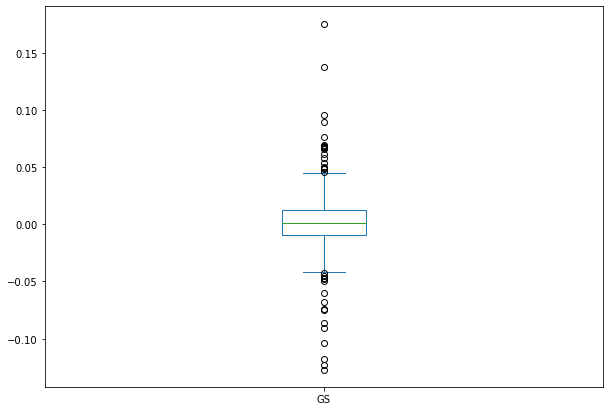

In [40]:
GS_daily_per_change.plot(kind = 'box',
                         figsize=(10,7))

- Now, let's examine all the returns.

<AxesSubplot:>

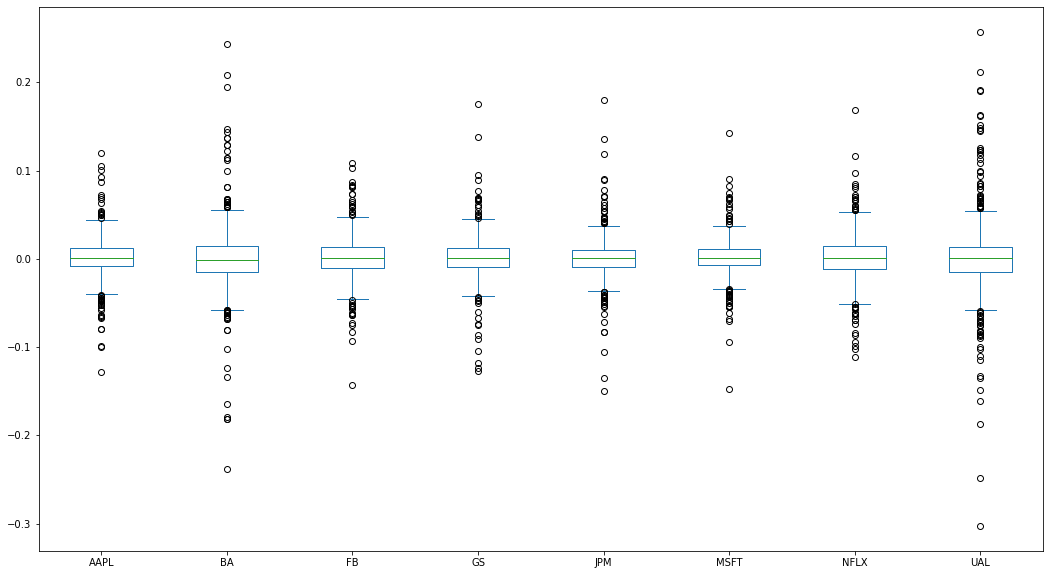

In [41]:
daily_per_change_pandas.plot(kind='box',
                             figsize=(18,10))

## 8. Comparison of daily percentage change between stocks

In [42]:
def scatter(data,
            x_stock_name,
            y_stock_name,
            xlim=None,
            ylim=None):
    
    fig = plt.figure(figsize=(10,7))
    
    ax = fig.add_subplot(111)
    
    ax.scatter(data[x_stock_name],
               data[y_stock_name],
               alpha=0.25)
    
    if xlim is not None:
        ax.set_xlim(xlim)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.autoscale(False)
    
    ax.vlines(0, -10, 10, color='grey')
    ax.hlines(0, -10, 10, color='grey')
    
    ax.plot((-10,10),(-10,10), color='orange') 
    # Benchmark for a Perfect Correlation (for a better comparison)
    
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

##### Netflix vs. Boeing

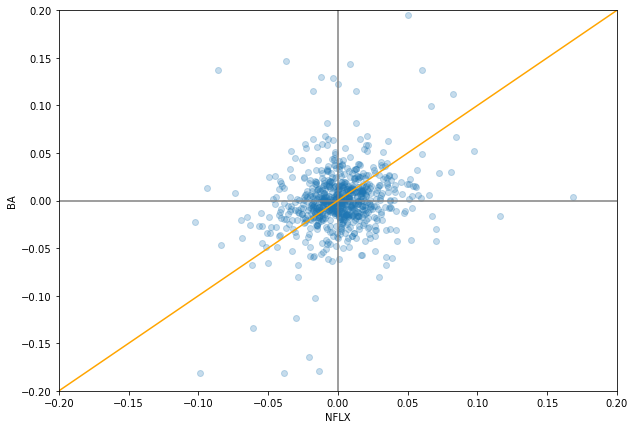

In [43]:
scatter(daily_per_change_pandas,
        'NFLX',
        'BA',
        xlim=(-0.20,0.20),
        ylim=(-0.20,0.20))

##### Goldman Sachs vs. JP Morgan Chase

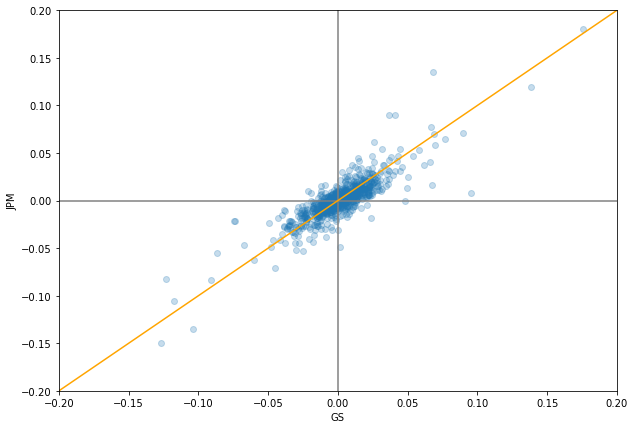

In [44]:
scatter(daily_per_change_pandas,
        'GS',
        'JPM',
        xlim=(-0.20, 0.20),
        ylim=(-0.20, 0.20))

## 9. Let's look at all stocks against each other, with a Kernel Density Estimation (KDE) in the diagonal


> `Kernels follow the conditions`:
    
$$ K(x) \geq 0, \int K(x) dx = 1, \int x K(x) dx = 0 $$

array([[<AxesSubplot:xlabel='AAPL', ylabel='AAPL'>,
        <AxesSubplot:xlabel='BA', ylabel='AAPL'>,
        <AxesSubplot:xlabel='FB', ylabel='AAPL'>,
        <AxesSubplot:xlabel='GS', ylabel='AAPL'>,
        <AxesSubplot:xlabel='JPM', ylabel='AAPL'>,
        <AxesSubplot:xlabel='MSFT', ylabel='AAPL'>,
        <AxesSubplot:xlabel='NFLX', ylabel='AAPL'>,
        <AxesSubplot:xlabel='UAL', ylabel='AAPL'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='BA'>,
        <AxesSubplot:xlabel='BA', ylabel='BA'>,
        <AxesSubplot:xlabel='FB', ylabel='BA'>,
        <AxesSubplot:xlabel='GS', ylabel='BA'>,
        <AxesSubplot:xlabel='JPM', ylabel='BA'>,
        <AxesSubplot:xlabel='MSFT', ylabel='BA'>,
        <AxesSubplot:xlabel='NFLX', ylabel='BA'>,
        <AxesSubplot:xlabel='UAL', ylabel='BA'>],
       [<AxesSubplot:xlabel='AAPL', ylabel='FB'>,
        <AxesSubplot:xlabel='BA', ylabel='FB'>,
        <AxesSubplot:xlabel='FB', ylabel='FB'>,
        <AxesSubplot:xlabel='GS', ylabel='FB'>,
    

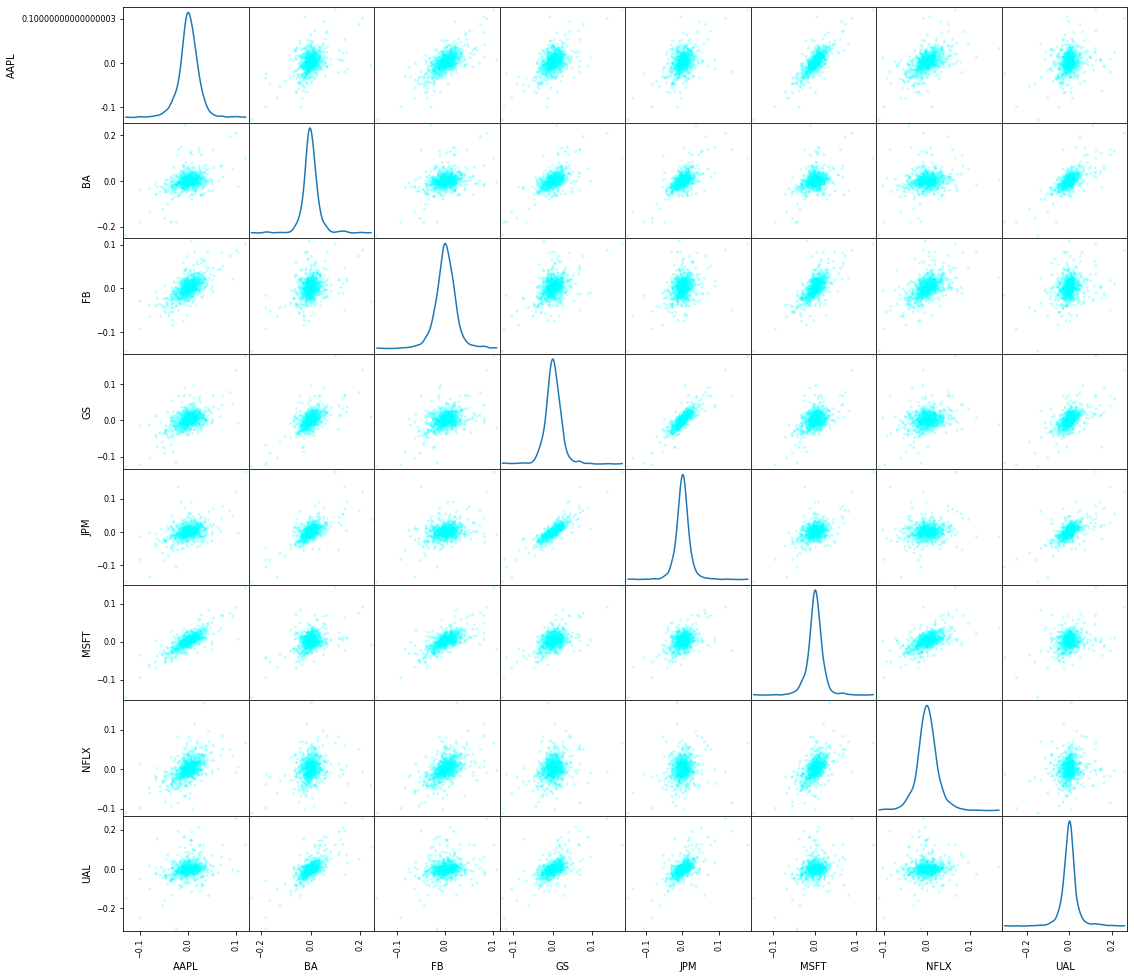

In [45]:
# pd.scatter_matrix() has been deprecated...

pd.plotting.scatter_matrix(daily_per_change_pandas,
                           diagonal='kde',
                           alpha=0.25,
                           figsize=(18,17),
                           color='cyan')

## 10. Moving Windows

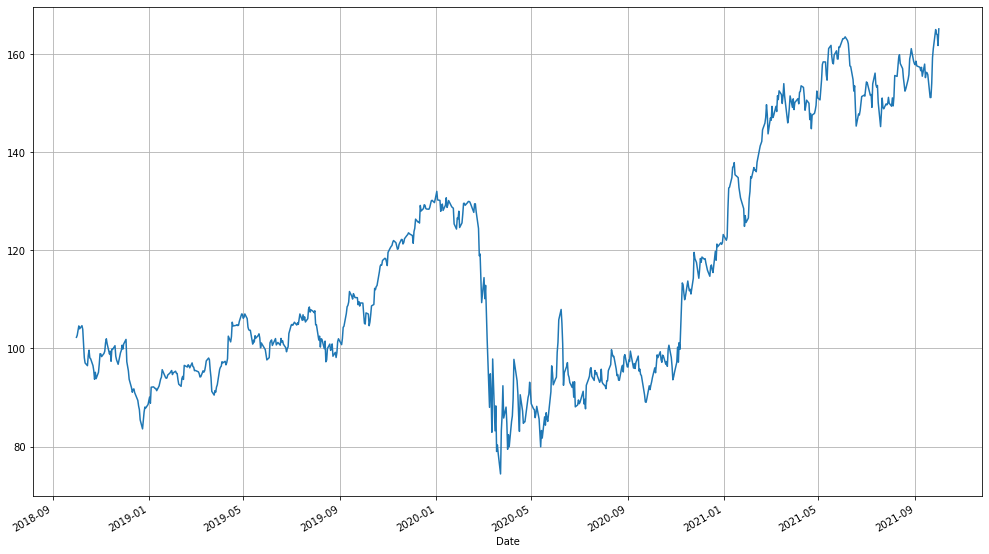

In [46]:
# 以JPM的"Adj Close"为例

JPM = daily_closing_prices['JPM']

JPM.plot(figsize=(17,10))

plt.grid()

## 11. Moving average


> It is calculated by taking the mean or average of the past data points of the prices. 

> It is called a moving average, as opposed to just an average, because the data set is continuously `moving`: the oldest data points are dropped from the data set to account for the new data as they become available.

> The moving average graph is a smooth line that follows the day-to-day values of the prices we are tracking but it has some lags.

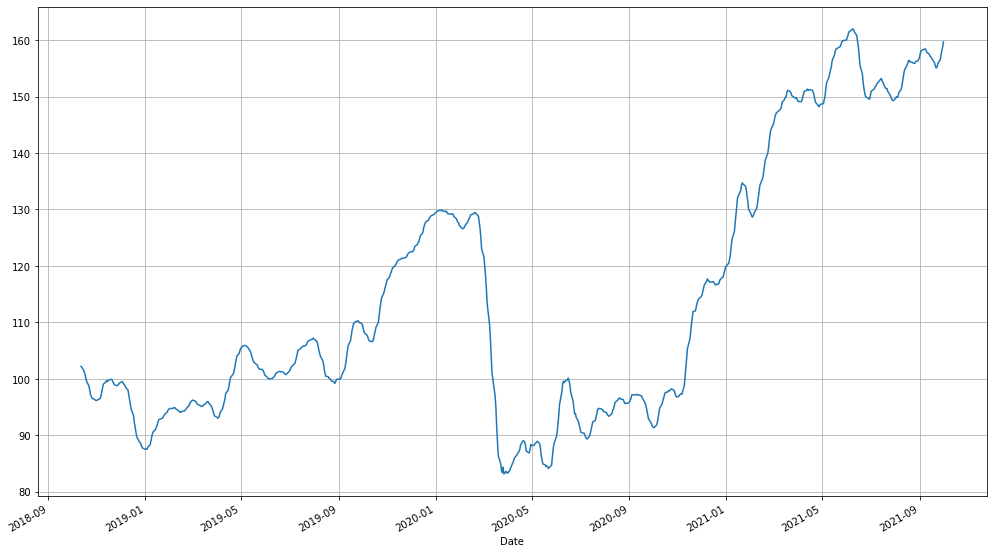

In [47]:
JPM.rolling(10).mean().plot(figsize=(17,10))

plt.grid()

- Depending on the type of investor or trader (e.g., short-term vs. long-term; high risk vs. low risk trading), we may adjust our **moving time average** (10 days, 20 days, 50 days, 200 days, 1 year, 5 years, etc).




- The two widely MAs that traders and investors used are **50-day MA** and **200-day MA.**

- Question: Which moving average (50-day MA or 200-day MA) do you think will have a greater degree of lag?


- Answer: 200-day MA in that it contains the prices for the past 200 days.

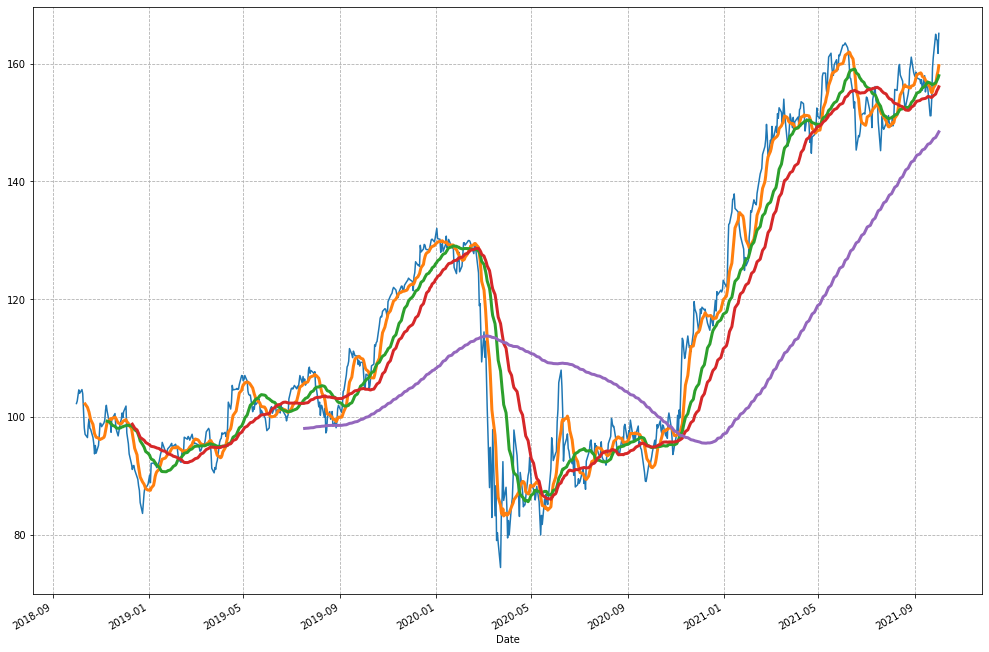

In [48]:
JPM.plot(figsize=(17,12))

JPM.rolling(10).mean().plot(figsize=(17,12),lw=3)
JPM.rolling(30).mean().plot(figsize=(17,12),lw=3)
JPM.rolling(50).mean().plot(figsize=(17,12),lw=3)
JPM.rolling(200).mean().plot(figsize=(17,12),lw=3)

plt.grid(linestyle='--')

### 12.Mean Absolute Deviation (MAD)

In [49]:
mean_absolute_dev = lambda x: np.fabs(x - x.mean()).mean()

<AxesSubplot:xlabel='Date'>

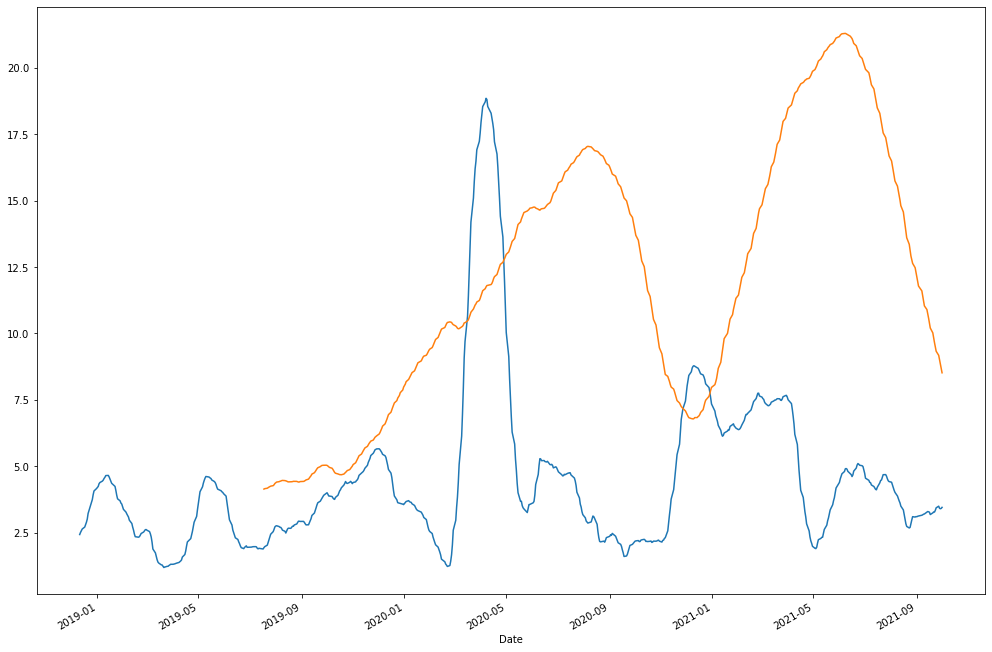

In [50]:
JPM.rolling(50).apply(mean_absolute_dev).plot(figsize=(17,12))
JPM.rolling(200).apply(mean_absolute_dev).plot(figsize=(17,12))

### 13. Volatility Calculation



> We set a minimum of 80 days.




- First calculate the rolling standard deviation.

In [51]:
volatility = daily_per_change_pandas.rolling(80).std() * np.sqrt(80)

<AxesSubplot:xlabel='Date'>

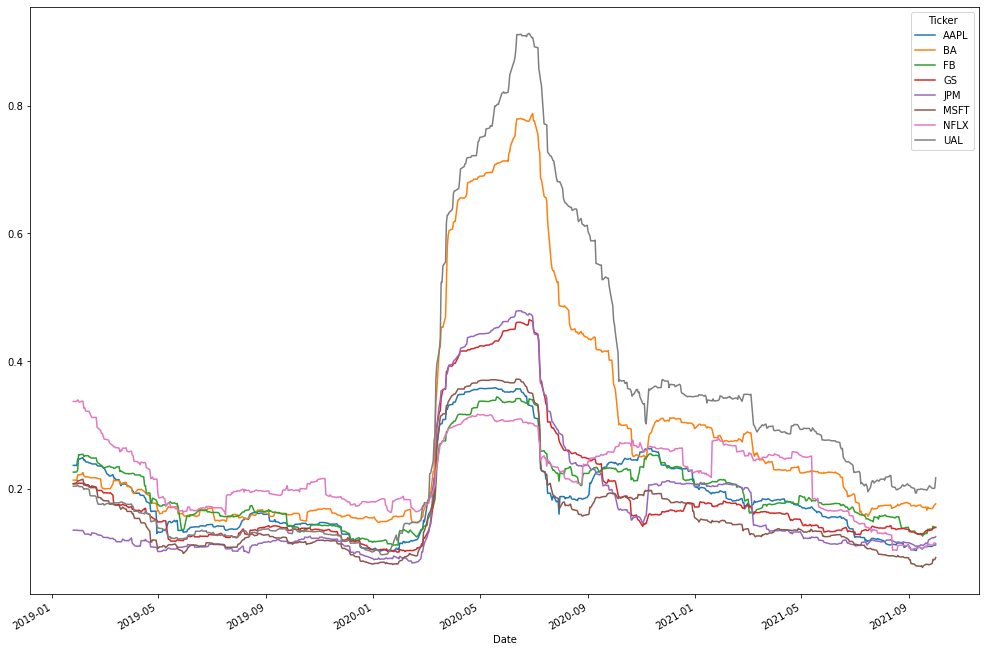

In [52]:
volatility.plot(figsize=(17,12))

### 14. Rolling correlation of returns




- Rolling correlation of Boeing and United Airlines

In [53]:
roll_corr = daily_closing_prices['BA'].rolling(20).corr(daily_closing_prices['UAL']).dropna()

roll_corr

Date
2018-10-26    0.120950
2018-10-29    0.043542
2018-10-30   -0.037558
2018-10-31   -0.168965
2018-11-01   -0.246004
                ...   
2021-09-27    0.820392
2021-09-28    0.806814
2021-09-29    0.836872
2021-09-30    0.845793
2021-10-01    0.879094
Length: 738, dtype: float64

<AxesSubplot:xlabel='Date'>

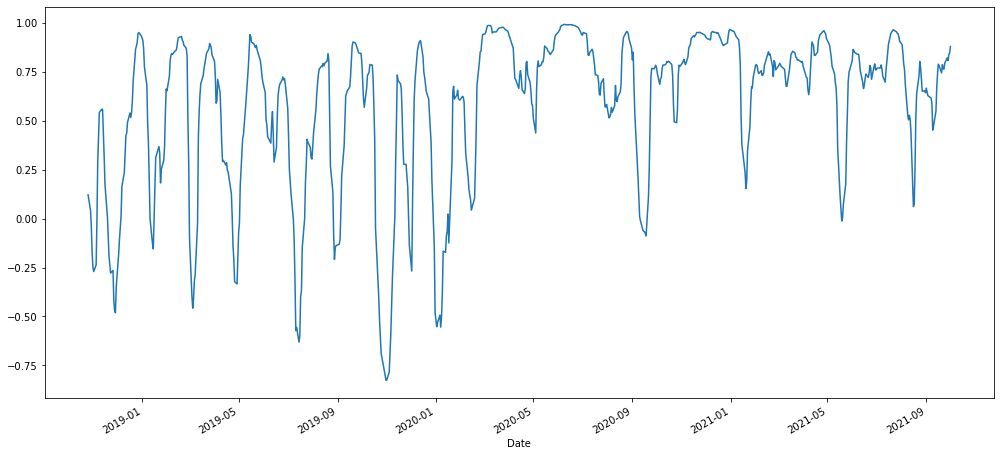

In [54]:
roll_corr.plot(figsize=(17,8))

### 15. Least squares regression of returns (beta)



- Let's regress the returns of GS onto JPM, using **Ordinary least squares** method.

In [55]:
import statsmodels.api as sm

In [56]:
X = sm.add_constant(daily_per_change_pandas['GS'])

MODEL = sm.OLS(daily_per_change_pandas['JPM'], X).fit()


print(X.head())
print('-----------------------------')
print(MODEL.params)
print('-----------------------------')
print(MODEL.rsquared)
print('-----------------------------')
print(str(MODEL.summary()))

            const        GS
Date                       
2018-10-01    1.0  0.000000
2018-10-02    1.0  0.003284
2018-10-03    1.0  0.007564
2018-10-04    1.0 -0.001317
2018-10-05    1.0 -0.007781
-----------------------------
const    0.000021
GS       0.831965
dtype: float64
-----------------------------
0.7366817896979718
-----------------------------
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     2112.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          5.76e-221
Time:                        22:39:09   Log-Likelihood:                 2304.1
No. Observations:                 757   AIC:                            -4604.
Df Residuals:                     755   BIC:                            -4595.
Df Model:   

D:\A\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [57]:
# 看刚定义的model有啥可用的属性attributes
#for ATTR in dir(MODEL):
#    if not ATTR.startwith("_"):
#        print(ATTR)

## 16. Comparing stocks to the S&P 500



- Let's calculate the percentage change on the close for S&P 500 first.

In [58]:
SP_500 = web.DataReader('^GSPC','yahoo',
                        start, end)

In [59]:
SP500_DAILY_PER_CHANGE = SP_500['Adj Close'].pct_change().fillna(0)
SP500_DAILY_PER_CHANGE

Date
2018-10-01    0.000000
2018-10-02   -0.000397
2018-10-03    0.000712
2018-10-04   -0.008169
2018-10-05   -0.005528
                ...   
2021-09-27   -0.002776
2021-09-28   -0.020364
2021-09-29    0.001569
2021-09-30   -0.011910
2021-10-01    0.011491
Name: Adj Close, Length: 757, dtype: float64

- Then, let's concat the S&P data with the other daily pct values.

In [60]:
daily_per_change_all = pd.concat([SP500_DAILY_PER_CHANGE,
                                  daily_per_change_pandas], axis=1)


daily_per_change_all

Adj Close      AAPL        BA        FB        GS       JPM  \
Date                                                                      
2018-10-01   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-10-02  -0.000397  0.008888  0.010673 -0.019146  0.003284  0.004141   
2018-10-03   0.000712  0.012169  0.015348  0.019456  0.007564  0.009388   
2018-10-04  -0.008169 -0.017581 -0.005888 -0.022040 -0.001317  0.009016   
2018-10-05  -0.005528 -0.016229 -0.009026 -0.009569 -0.007781 -0.005639   
...               ...       ...       ...       ...       ...       ...   
2021-09-27  -0.002776 -0.010550  0.012512  0.001757  0.022924  0.024166   
2021-09-28  -0.020364 -0.023801 -0.025651 -0.036569 -0.025787 -0.005390   
2021-09-29   0.001569  0.006483  0.031821 -0.003053 -0.011836 -0.000783   
2021-09-30  -0.011910 -0.009312 -0.024050 -0.000648 -0.017823 -0.013619   
2021-10-01   0.011491  0.008127  0.027553  0.010666  0.005211  0.021015   

                MSFT      NFLX       UAL  
Date                                      
2018-10-01  0.000000  0.000000  0.000000  
2018-10-02 -0.003979 -0.011247 -0.010273  
2018-10-03  0.000174 -0.000239  0.007842  
2018-10-04 -0.020665 -0.035539 -0.015448  
2018-10-05 -0.005852 -0.033824 -0.022083  
...              ...       ...       ...  
2021-09-27 -0.017304  0.000422  0.005944  
2021-09-28 -0.036204 -0.014832 -0.008150  
2021-09-29  0.001693  0.026051  0.000616  
2021-09-30 -0.007324  0.018830 -0.023404  
2021-10-01  0.025468  0.004604  0.079252  

[757 rows x 9 columns]

In [61]:
daily_per_change_all.rename(columns={'Adj Close':'SP500'},
                            inplace=True)

> Let's calculate the cumulative, from all the daily.

In [62]:
cumulative_daily_return_all = (1 + daily_per_change_all).cumprod()
cumulative_daily_return_all

SP500      AAPL        BA        FB        GS       JPM  \
Date                                                                     
2018-10-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2018-10-02  0.999603  1.008888  1.010673  0.980854  1.003284  1.004141   
2018-10-03  1.000315  1.021165  1.026184  0.999938  1.010873  1.013568   
2018-10-04  0.992142  1.003212  1.020142  0.977900  1.009542  1.022707   
2018-10-05  0.986658  0.986931  1.010934  0.968542  1.001686  1.016940   
...              ...       ...       ...       ...       ...       ...   
2021-09-27  1.519225  2.641018  0.606227  2.176681  1.884777  1.613264   
2021-09-28  1.488287  2.578159  0.590676  2.097082  1.836173  1.604569   
2021-09-29  1.490623  2.594873  0.609472  2.090680  1.814441  1.603313   
2021-09-30  1.472870  2.570710  0.594814  2.089325  1.782102  1.581478   
2021-10-01  1.489795  2.591603  0.611203  2.111610  1.791389  1.614713   

                MSFT      NFLX       UAL  
Date                                      
2018-10-01  1.000000  1.000000  1.000000  
2018-10-02  0.996021  0.988753  0.989727  
2018-10-03  0.996194  0.988517  0.997489  
2018-10-04  0.975608  0.953386  0.982080  
2018-10-05  0.969899  0.921139  0.960393  
...              ...       ...       ...  
2021-09-27  2.637895  1.553732  0.560210  
2021-09-28  2.542394  1.530687  0.555644  
2021-09-29  2.546698  1.570563  0.555987  
2021-09-30  2.528047  1.600136  0.542975  
2021-10-01  2.592431  1.607503  0.586006  

[757 rows x 9 columns]

> Let's calculate the correlations.

In [63]:
corr_all = cumulative_daily_return_all.corr()
corr_all

SP500      AAPL        BA        FB        GS       JPM      MSFT  \
SP500  1.000000  0.933154 -0.401167  0.964783  0.944527  0.887825  0.944460   
AAPL   0.933154  1.000000 -0.662239  0.951825  0.802864  0.703570  0.974596   
BA    -0.401167 -0.662239  1.000000 -0.538459 -0.227268 -0.064650 -0.656302   
FB     0.964783  0.951825 -0.538459  1.000000  0.864252  0.763440  0.971238   
GS     0.944527  0.802864 -0.227268  0.864252  1.000000  0.944932  0.837986   
JPM    0.887825  0.703570 -0.064650  0.763440  0.944932  1.000000  0.733833   
MSFT   0.944460  0.974596 -0.656302  0.971238  0.837986  0.733833  1.000000   
NFLX   0.824130  0.920924 -0.700534  0.875389  0.683755  0.531546  0.903896   
UAL   -0.433741 -0.687834  0.968431 -0.573360 -0.255232 -0.069922 -0.683937   

           NFLX       UAL  
SP500  0.824130 -0.433741  
AAPL   0.920924 -0.687834  
BA    -0.700534  0.968431  
FB     0.875389 -0.573360  
GS     0.683755 -0.255232  
JPM    0.531546 -0.069922  
MSFT   0.903896 -0.683937  
NFLX   1.000000 -0.764319  
UAL   -0.764319  1.000000

- Let's see how well did each stock relate to the S&P 500.

In [64]:
corr_all.loc['SP500']

SP500    1.000000
AAPL     0.933154
BA      -0.401167
FB       0.964783
GS       0.944527
JPM      0.887825
MSFT     0.944460
NFLX     0.824130
UAL     -0.433741
Name: SP500, dtype: float64

- Let's plot Netflix and Goldman Sachs against S&P500.

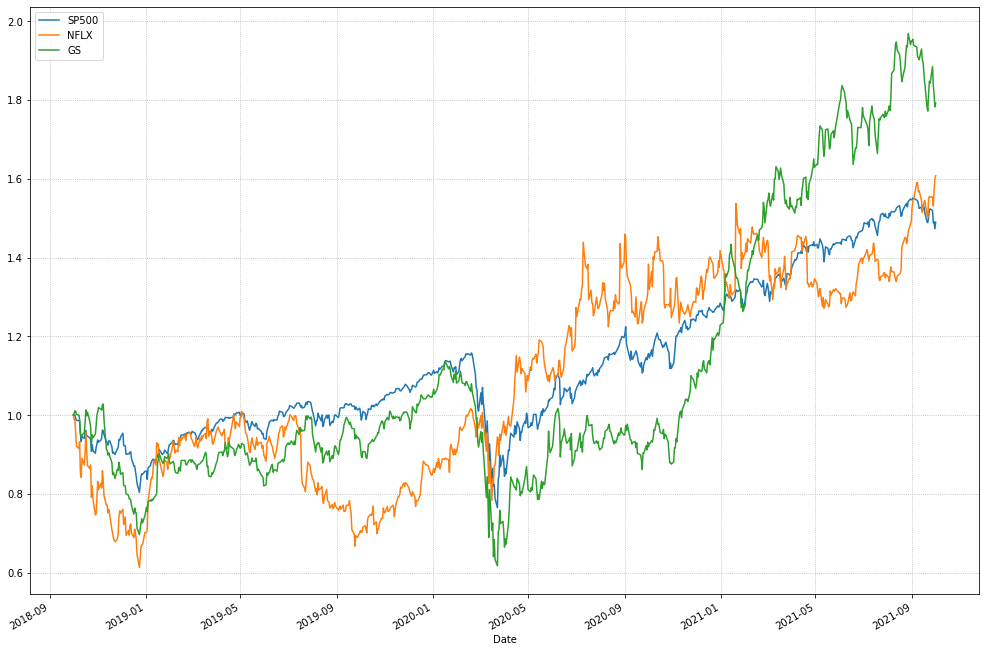

In [65]:
cumulative_daily_return_all[['SP500','NFLX','GS']].plot(figsize=(17,12))

plt.grid(linestyle='dotted')

- Goldman Sachs vs S&P 500

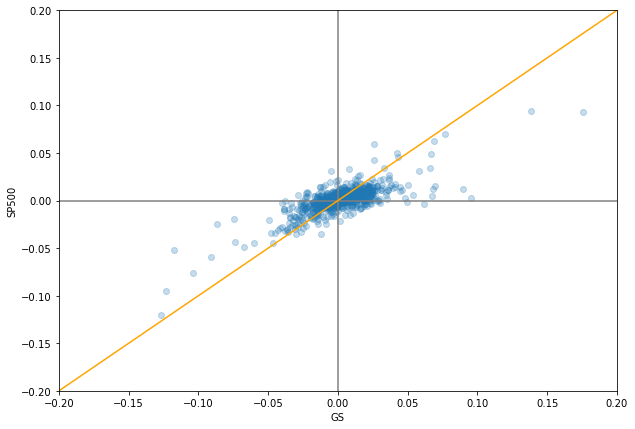

In [66]:
scatter(daily_per_change_all,
        'GS',
        'SP500',
        xlim=(-0.20,0.20),
        ylim=(-0.20,0.20))

- JPM VS SP500

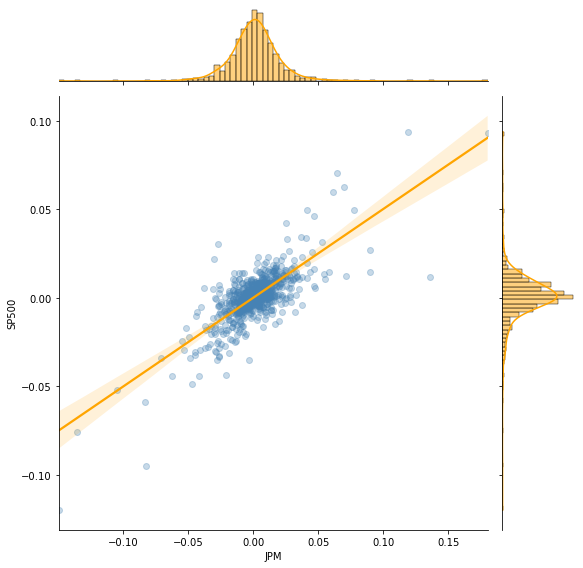

In [67]:
sns.jointplot(x='JPM',
              y='SP500',
              data=daily_per_change_all,
              kind='reg',
              scatter_kws={'alpha':0.3,
                           'color':'steelblue'},
              height=8,
              color='orange')

In [68]:
exit()